Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Tiago Flora"
COLLABORATORS = ["Ara Mkhoyan", "Cameron Watts", "Chloe Gabrielle Go"]

---

# CS110 Pre-class Work 2.1

## Question 1.

First, please read carefully [this note](https://drive.google.com/open?id=1SfrRTKWDb6szsJENgvNF7-u2B96ecaF2) which reviews the MERGE operation in Cormen et al.

After reviewing the example above (Cormen et. al., Figure 2.3),  you need to manually create similar illustrations as in the example above but this time for the input array:

![array](array.png)

For this exercise, assume that the call to the algorithm is MERGE(A, 1, 3, 6) and draw different resulting stages of the arrays A, L, and R as the merge algorithm is executed.  You can hand-draw or use any drawing tool to produce panel illustrations as in the example above.  Include your final drawings in the cell below. Feel free to use additional cells (Markdown or Code) for this question.


![img](https://i.ibb.co/k6ffpmv/Page1.jpg)

![img](https://i.ibb.co/HPHbC59/Page2.jpg)

## Question 2.
Now using your understanding of Part I of the merge algorithm, can you think of an efficient way to implement this part in Python? (hint: using Python list). Give your answer in prose in the cell below.

First, one defines the (empty) left and right arrays (using lists), which are to be filled with the values of the array A until and after q, respectively. Then, in the desired range (from A[1] to A[n1] and from A[n1+1] to A[n2]), we append the elements of A onto the L and R arrays (using the .append() function). At last, we assign the last elements of the L and R arrays to be float(math.inf), so no value will be larger than the sentinel values.

## Question 3.

Write a Python implementation of the merge pseudocode (both parts), your Python function must take the same four input arguments as described in the $MERGE(A,p,q,r)$. Test your code by running the example in problem 1 and 2 of this pre-class work. Feel free to come up with additional cases to check if your code is working properly. Your code should return A 

In [2]:
import math
count_steps = 0

def merge(A, p, q, r):
    # Define global variable for counting steps
    global count_steps 
    # Define n1 and n2, the ranges of the L and R subarrays
    no = q - p
    nt = r - q
    # Create L and R
    L = []
    R = []
    count_steps += 4
    # Append the A elements left of q to L
    for i in range(no+1):
        L.append(A[p+i-1])
        count_steps += 2
    count_steps += 1
#    print(L)
    # Append the A elements right of q to R
    for j in range(nt):
        R.append(A[q+j])
        count_steps += 2
    count_steps += 1
#    print(R)
    # Define sentinel values
    L.append(float(math.inf)) # Or we could have 2**(32)...
    R.append(float(math.inf))
    # Define indices to compare the elements of the L and R arrays
    i = 0
    j = 0
    count_steps += 4
    for k in range(p-1, r):
        count_steps += 2
        if L[i] <= R[j]:
            count_steps += 1
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
            count_steps += 2
    return A

In [3]:
B = [3,6,10,5,1,4,2,4,5]
merge(B, 1, 4, 9)

[1, 3, 4, 2, 4, 5, 6, 10, 5]

In [4]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2
Suppose that your Python implementation of the merge algorithm is already working. Inspect the code for merge sort below:

In [5]:
def merge_sort(A,p,r):
    if p < r:
        q = (p+r)/2
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
    return(A)

Copy and paste the code above to the cell below and fix the bug in it. 

In [6]:
def merge_sort(A,p,r):
    # We ensure p, r and q will be integer values.
    p = int(p)
    r = int(r)
    if p < r:
        # q will always be the floor of the average of p and r if it is
        # not an integer
        q = math.floor((p+r)/2)
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
    return(A)

In [7]:
B = [10,3,6,5,11,4,2,1]
merge_sort(B, 1, 8)

[1, 2, 3, 4, 5, 6, 10, 11]

In [8]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

# Question 5.
As in the previous Lesson, count the number of steps and time your merge_sort() function with the following input: `list_k = [i for i in range(100*k, 0, -1)] `, where $k= 1, 2, 3, …, 15 $. 


In [9]:
# We redefine merge_sort to contain a step counter and return it
def merge_sort(A,p,r):
    global step_counter
    p = int(p)
    r = int(r)
    step_counter += 1
    if p < r:
        q = math.floor((p+r)/2)
        step_counter += 1
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
    return(step_counter)

In [10]:
import time
# Create arrays to store number of steps per list size and run time
# per list size
lst = []
time_lst = []

for k in range(15):
    # Reset counter value to 0
    step_counter = 0
    list_k = list(range(100*(k+1), 0, -1))
    # We use the time module to count the running time of each iteration
    # of the algorithm
    starting_time = time.time()
    # We append to the step counter list the number of steps in every iteration
    lst.append(merge_sort(list_k,1,len(list_k)))    
    ending_time = time.time()
    time_lst.append(ending_time-starting_time)

print(lst, time_lst)

[298, 598, 898, 1198, 1498, 1798, 2098, 2398, 2698, 2998, 3298, 3598, 3898, 4198, 4498] [0.0009970664978027344, 0.0009975433349609375, 0.0019941329956054688, 0.0029926300048828125, 0.003989458084106445, 0.003989219665527344, 0.005983591079711914, 0.006017208099365234, 0.006981372833251953, 0.007977962493896484, 0.008943319320678711, 0.009973287582397461, 0.011003732681274414, 0.014445066452026367, 0.02378702163696289]


# Question 6. 
Use the code you wrote for Lesson 1.2 (i.e., selection sort, bubble sort, insertion sort). Plot the following graphs:
* **Graph 1**: 4 lines for **the number of steps** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why? 
* **Graph 2**: 4 lines for **the timing** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why?

Using as many cells as you wish (code cells or markdown cells alike) to complete this question.


In [25]:
def bubbleSort(A):
    global step_counter_b
    step_counter_b = 0
    step_counter_b += 1
    for i in range(len(A)):
        step_counter_b += 2
        # j must start at len(A)-1, and  move backwards
        for j in range(len(A)-1, 0, -1):
            step_counter_b += 3
            # If an element is larger than the preceding number, they swap orders
            if A[j] < A[j-1]:
                step_counter_b += 1
                A[j], A[j-1] = A[j-1], A[j]
            j -= 1
    return step_counter_b

def insertionSort(A):
    global step_counter_i
    step_counter_i = 0
    step_counter_i += 1
    for j in range(len(A)):
        step_counter_i += 5
        key = A[j]
        i= j-1
        while i >= 0 and A[i]>key:
            step_counter_i += 4
            A[i+1] = A[i]
            i -= 1
        A[i+1] = key
    return step_counter_i

def selectionSort(A):
    global step_counter_s
    step_counter_s = 0
    # Iterate over the whole array and assume an element is the smallest for comparison
    step_counter_s += 1
    for i in range(len(A)):
        step_counter_s += 2
        minidx = i
        for j in range(len(A)):
            step_counter_s += 2
            # For every next element, compare it to the current one
            if A[j] > A[minidx]:
                step_counter_s += 1
                # If any element is smaller, the minimum element is now assumed to be it
                minidx = j
            # Swap the positions of the original element being compared (A[i]) and the new minimum
            A[i], A[minidx] = A[minidx], A[i]
    return step_counter_s

In [26]:
# We create lists for all algorithms
time_bubble = []
time_insert = []
time_select = []
steps_bubble = []
steps_insert = []
steps_select = []

for k in range(15):
    step_counter_b = 0
    list_k = list(range(100*(k+1), 0, -1))
    starting_time = time.time()
    steps_bubble.append(bubbleSort(list_k))    
    ending_time = time.time()
    time_bubble.append(ending_time-starting_time)
    
for k in range(15):
    step_counter_i = 0
    list_k = list(range(100*(k+1), 0, -1))
    starting_time = time.time()
    steps_insert.append(insertionSort(list_k))    
    ending_time = time.time()
    time_insert.append(ending_time-starting_time)

for k in range(15):
    step_counter_s = 0
    list_k = list(range(100*(k+1), 0, -1))
    starting_time = time.time()
    steps_select.append(selectionSort(list_k))    
    ending_time = time.time()
    time_select.append(ending_time-starting_time)

In [27]:
import matplotlib.pyplot as plt
import numpy

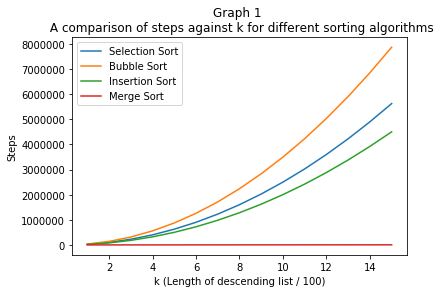

In [33]:
%matplotlib inline
# Define k to be an array with integers from 1 to 15
k = list(range(1, 16))

plt.plot(k, steps_select, label="Selection Sort")
plt.plot(k, steps_bubble, label="Bubble Sort")
plt.plot(k, steps_insert, label="Insertion Sort")
plt.plot(k, lst, label="Merge Sort")
plt.xlabel('k (Length of descending list / 100)')
plt.ylabel('Steps')
plt.title('Graph 1 \n A comparison of steps against k for different sorting algorithms')
plt.legend()
plt.show()

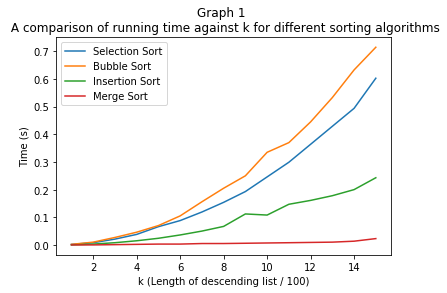

In [34]:
%matplotlib inline

k = list(range(1, 16))

plt.plot(k, time_select, label = "Selection Sort")
plt.plot(k, time_bubble, label = "Bubble Sort")
plt.plot(k, time_insert, label = "Insertion Sort")
plt.plot(k, time_lst, label = "Merge Sort")

plt.xlabel('k (Length of descending list / 100)')
plt.ylabel('Time (s)')
plt.title('Graph 1 \n A comparison of running time against k for different sorting algorithms')
plt.legend()
plt.show()